In [15]:
import numpy as np
import pandas as pd

In [16]:

# Chỉ định mã hóa chính xác 
all_data_cleaned = pd.read_csv('C:\\Users\\Admin\\Downloads\\Học tập\\Đồ án 2\\code\\Project DA2\\data_final.csv')

# Hiển thị DataFrame
all_data_cleaned


,LAT,LON,DATE,YEAR,MONTH,DAY,QV2M,RH2M,PRECTOTCORR,PS,...,WS2M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PRECTOTCORR_TODAY,PRECTOTCORR_1_DAY_AFTER
0,18.25,103.25,2000-01-01,2000,1,1,12.41,84.03,0.00,97.21,...,0.89,19.93,16.89,18.41,19.68,11.92,26.69,14.77,0.0,0.0
1,18.25,103.75,2000-01-01,2000,1,1,12.24,84.41,0.00,97.93,...,0.86,19.74,16.80,18.27,19.59,11.78,26.36,14.58,0.0,0.0
2,18.25,104.25,2000-01-01,2000,1,1,11.58,84.33,0.00,96.36,...,0.49,18.64,15.65,17.14,18.60,11.15,25.10,13.95,0.0,0.0
3,18.25,104.75,2000-01-01,2000,1,1,11.16,85.76,0.00,94.71,...,0.33,17.47,14.82,16.14,17.42,10.06,23.37,13.32,0.0,0.0
4,18.25,105.25,2000-01-01,2000,1,1,11.33,88.11,0.00,95.31,...,0.56,17.28,15.15,16.21,17.07,8.77,22.52,13.75,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345955,20.25,104.75,2023-10-21,2023,10,21,10.82,79.52,0.12,94.18,...,0.42,18.00,14.27,16.13,17.61,7.06,21.74,14.68,1.0,1.0
345956,20.25,105.25,2023-10-21,2023,10,21,11.53,80.28,0.24,97.66,...,1.69,19.35,15.78,17.56,19.13,6.25,22.45,16.19,1.0,1.0
345957,20.25,105.75,2023-10-21,2023,10,21,12.68,81.65,0.50,100.77,...,3.63,21.10,17.77,19.43,21.38,5.73,23.83,18.11,1.0,1.0
345958,20.25,106.25,2023-10-21,2023,10,21,13.49,81.50,1.25,101.68,...,5.00,22.24,18.92,20.58,23.49,4.40,24.34,19.94,1.0,1.0


In [17]:
# Xác định biến đặc trưng (features) và biến mục tiêu (target)
X = all_data_cleaned.drop(columns=['PRECTOTCORR_1_DAY_AFTER','DATE'])
y = all_data_cleaned['PRECTOTCORR_1_DAY_AFTER']

In [18]:
from sklearn.preprocessing import StandardScaler

# Chọn ra các cột mà bạn muốn chuẩn hóa (loại bỏ 'PRECTOTCORR_TODAY' khỏi danh sách)
columns_to_scale = X.columns.difference(['PRECTOTCORR_TODAY'])

# Khởi tạo scaler cho biến đặc trưng và biến mục tiêu
scaler_X = StandardScaler()

# Chuẩn hóa dữ liệu đặc trưng (biến độc lập) chỉ cho các cột cần chuẩn hóa
X[columns_to_scale] = scaler_X.fit_transform(X[columns_to_scale])

# In ra X sau khi chuẩn hóa
X

,LAT,LON,YEAR,MONTH,DAY,QV2M,RH2M,PRECTOTCORR,PS,WS10M,...,ALLSKY_SFC_LW_DWN,WS2M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,PRECTOTCORR_TODAY
0,-1.414214,-1.527525,-1.659752,-1.591281,-1.667274,-0.645527,0.308862,-0.414047,0.249249,-0.341702,...,-1.174064,-0.390762,-0.645783,-0.430856,-0.548961,-0.715605,1.097053,-0.089057,-0.912255,0.0
1,-1.414214,-1.091089,-1.659752,-1.591281,-1.667274,-0.686441,0.348209,-0.414047,0.420370,-0.387270,...,-1.174064,-0.406397,-0.686088,-0.448155,-0.578041,-0.734607,1.063903,-0.160722,-0.946624,0.0
2,-1.414214,-0.654654,-1.659752,-1.591281,-1.667274,-0.845281,0.339926,-0.414047,0.047231,-0.488532,...,-1.444840,-0.599225,-0.919432,-0.669196,-0.812753,-0.943634,0.914727,-0.434349,-1.060584,0.0
3,-1.414214,-0.218218,-1.659752,-1.591281,-1.667274,-0.946362,0.487995,-0.414047,-0.344922,-0.544226,...,-1.444840,-0.682610,-1.167625,-0.828731,-1.020463,-1.192777,0.656628,-0.810045,-1.174545,0.0
4,-1.414214,0.218218,-1.659752,-1.591281,-1.667274,-0.905448,0.731325,-0.414047,-0.202321,-0.488532,...,-1.500225,-0.562744,-1.207930,-0.765301,-1.005924,-1.266675,0.351172,-0.994635,-1.096762,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345955,1.414214,-0.218218,1.686753,1.029187,0.604669,-1.028188,-0.158124,-0.402522,-0.470886,-0.265756,...,-0.019856,-0.635705,-1.055196,-0.934446,-1.022540,-1.152660,-0.053734,-1.164024,-0.928535,1.0
345956,1.414214,0.218218,1.686753,1.029187,0.604669,-0.857315,-0.079430,-0.390997,0.356199,0.427888,...,-0.019856,0.026163,-0.768819,-0.644209,-0.725515,-0.831731,-0.245532,-1.009837,-0.655391,1.0
345957,1.414214,0.654654,1.686753,1.029187,0.604669,-0.580547,0.062426,-0.366027,1.095348,1.313930,...,-0.019856,1.037206,-0.397590,-0.261711,-0.337097,-0.356670,-0.368662,-0.710149,-0.308083,1.0
345958,1.414214,1.091089,1.686753,1.029187,0.604669,-0.385606,0.046894,-0.293998,1.311626,1.962006,...,-0.019856,1.751190,-0.155761,-0.040669,-0.098230,0.088831,-0.683589,-0.599395,0.022945,1.0


In [19]:
X = X.drop(columns = ['PRECTOTCORR_TODAY'])

In [20]:
X

,LAT,LON,YEAR,MONTH,DAY,QV2M,RH2M,PRECTOTCORR,PS,WS10M,...,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,WS2M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN
0,-1.414214,-1.527525,-1.659752,-1.591281,-1.667274,-0.645527,0.308862,-0.414047,0.249249,-0.341702,...,0.452931,-1.174064,-0.390762,-0.645783,-0.430856,-0.548961,-0.715605,1.097053,-0.089057,-0.912255
1,-1.414214,-1.091089,-1.659752,-1.591281,-1.667274,-0.686441,0.348209,-0.414047,0.420370,-0.387270,...,0.452931,-1.174064,-0.406397,-0.686088,-0.448155,-0.578041,-0.734607,1.063903,-0.160722,-0.946624
2,-1.414214,-0.654654,-1.659752,-1.591281,-1.667274,-0.845281,0.339926,-0.414047,0.047231,-0.488532,...,0.433745,-1.444840,-0.599225,-0.919432,-0.669196,-0.812753,-0.943634,0.914727,-0.434349,-1.060584
3,-1.414214,-0.218218,-1.659752,-1.591281,-1.667274,-0.946362,0.487995,-0.414047,-0.344922,-0.544226,...,0.433745,-1.444840,-0.682610,-1.167625,-0.828731,-1.020463,-1.192777,0.656628,-0.810045,-1.174545
4,-1.414214,0.218218,-1.659752,-1.591281,-1.667274,-0.905448,0.731325,-0.414047,-0.202321,-0.488532,...,-0.415670,-1.500225,-0.562744,-1.207930,-0.765301,-1.005924,-1.266675,0.351172,-0.994635,-1.096762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345955,1.414214,-0.218218,1.686753,1.029187,0.604669,-1.028188,-0.158124,-0.402522,-0.470886,-0.265756,...,-0.085846,-0.019856,-0.635705,-1.055196,-0.934446,-1.022540,-1.152660,-0.053734,-1.164024,-0.928535
345956,1.414214,0.218218,1.686753,1.029187,0.604669,-0.857315,-0.079430,-0.390997,0.356199,0.427888,...,-0.085846,-0.019856,0.026163,-0.768819,-0.644209,-0.725515,-0.831731,-0.245532,-1.009837,-0.655391
345957,1.414214,0.654654,1.686753,1.029187,0.604669,-0.580547,0.062426,-0.366027,1.095348,1.313930,...,-0.085846,-0.019856,1.037206,-0.397590,-0.261711,-0.337097,-0.356670,-0.368662,-0.710149,-0.308083
345958,1.414214,1.091089,1.686753,1.029187,0.604669,-0.385606,0.046894,-0.293998,1.311626,1.962006,...,-0.085846,-0.019856,1.751190,-0.155761,-0.040669,-0.098230,0.088831,-0.683589,-0.599395,0.022945


In [21]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
345955    1.0
345956    1.0
345957    1.0
345958    1.0
345959    1.0
Name: PRECTOTCORR_1_DAY_AFTER, Length: 345960, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

# Chia tập dữ liệu thành tập huấn luyện và tập còn lại với stratify=y
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

# Chia tập còn lại thành tập kiểm tra và tập validation với stratify=y_temp
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=40, stratify=y_temp)


In [23]:
import numpy as np

# In ra các giá trị duy nhất trong y_train, y_test và y_val
print("Các giá trị duy nhất trong y_train:", np.unique(y_train))
print("Các giá trị duy nhất trong y_test:", np.unique(y_test))
print("Các giá trị duy nhất trong y_val:", np.unique(y_val))

# Kiểm tra phân phối của biến độc lập trên các tập dữ liệu
train_distribution = np.unique(y_train, return_counts=True)
test_distribution = np.unique(y_test, return_counts=True)
val_distribution = np.unique(y_val, return_counts=True)

print("\nPhân phối của biến độc lập trên tập huấn luyện:")
for value, count in zip(train_distribution[0], train_distribution[1]):
    print(f"{value}: {count} ({count / len(y_train) * 100:.2f}%)")

print("\nPhân phối của biến độc lập trên tập kiểm thử:")
for value, count in zip(test_distribution[0], test_distribution[1]):
    print(f"{value}: {count} ({count / len(y_test) * 100:.2f}%)")

print("\nPhân phối của biến độc lập trên tập validation:")
for value, count in zip(val_distribution[0], val_distribution[1]):
    print(f"{value}: {count} ({count / len(y_val) * 100:.2f}%)")


Các giá trị duy nhất trong y_train: [0. 1. 2. 3. 4. 5.]
Các giá trị duy nhất trong y_test: [0. 1. 2. 3. 4. 5.]
Các giá trị duy nhất trong y_val: [0. 1. 2. 3. 4. 5.]

Phân phối của biến độc lập trên tập huấn luyện:
0.0: 33908 (14.00%)
1.0: 162137 (66.95%)
2.0: 30242 (12.49%)
3.0: 13762 (5.68%)
4.0: 1700 (0.70%)
5.0: 423 (0.17%)

Phân phối của biến độc lập trên tập kiểm thử:
0.0: 7266 (14.00%)
1.0: 34744 (66.95%)
2.0: 6480 (12.49%)
3.0: 2949 (5.68%)
4.0: 364 (0.70%)
5.0: 91 (0.18%)

Phân phối của biến độc lập trên tập validation:
0.0: 7266 (14.00%)
1.0: 34744 (66.95%)
2.0: 6481 (12.49%)
3.0: 2949 (5.68%)
4.0: 364 (0.70%)
5.0: 90 (0.17%)


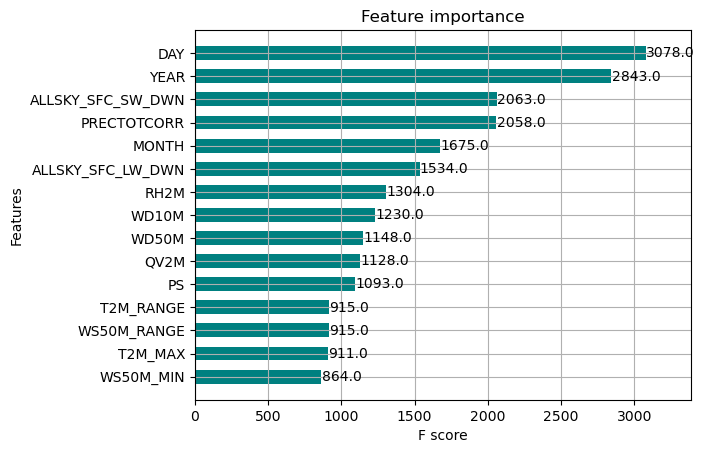

In [24]:

# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model,max_num_features=15,color='teal',height=0.6)
pyplot.show()

In [25]:
import numpy as np
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Tắt cảnh báo liên quan đến tên đặc trưng
warnings.filterwarnings("ignore", category=UserWarning)

# Huấn luyện mô hình trên toàn bộ dữ liệu huấn luyện
model = XGBClassifier(tree_method='hist', device='cuda')
model.fit(X_train, y_train)

# Lấy tên các đặc trưng
feature_names = X_train.columns

# Huấn luyện mô hình sử dụng mỗi độ quan trọng như một ngưỡng và theo dõi mô hình tốt nhất
best_accuracy = 0
best_threshold = 0
best_model = None
best_selection = None

# Duyệt qua các ngưỡng
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
    # Chọn các đặc trưng sử dụng ngưỡng
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # Huấn luyện mô hình
    selection_model = XGBClassifier(tree_method='hist', device='cuda')
    selection_model.fit(select_X_train, y_train)
    
    # Đánh giá mô hình
    select_X_validation = selection.transform(X_val)
    predictions = selection_model.predict(select_X_validation)
    accuracy = accuracy_score(y_val, predictions)
    
    # Cập nhật thông tin nếu mô hình hiện tại tốt hơn
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = thresh
        best_model = selection_model
        best_selection = selection

    print("số đặc trưng=%d, Độ chính xác: %.5f" % (select_X_train.shape[1], accuracy))

# Sử dụng thông tin về mô hình tốt nhất và dữ liệu đã chọn
print("\nMô hình tốt nhất:")
print("Số đặc trưng:", 12)
print("Độ chính xác của mô hình tốt nhất: %.5f" % (best_accuracy))


số đặc trưng=29, Độ chính xác: 0.75589
số đặc trưng=28, Độ chính xác: 0.75710
số đặc trưng=27, Độ chính xác: 0.75537
số đặc trưng=26, Độ chính xác: 0.75558
số đặc trưng=25, Độ chính xác: 0.75604
số đặc trưng=24, Độ chính xác: 0.75600
số đặc trưng=23, Độ chính xác: 0.75739
số đặc trưng=22, Độ chính xác: 0.75797
số đặc trưng=21, Độ chính xác: 0.75779
số đặc trưng=20, Độ chính xác: 0.75672
số đặc trưng=19, Độ chính xác: 0.75776
số đặc trưng=18, Độ chính xác: 0.75781
số đặc trưng=17, Độ chính xác: 0.75764
số đặc trưng=16, Độ chính xác: 0.75966
số đặc trưng=15, Độ chính xác: 0.75972
số đặc trưng=14, Độ chính xác: 0.75911
số đặc trưng=13, Độ chính xác: 0.75885
số đặc trưng=12, Độ chính xác: 0.76040
số đặc trưng=11, Độ chính xác: 0.75768
số đặc trưng=10, Độ chính xác: 0.74382
số đặc trưng=9, Độ chính xác: 0.74365
số đặc trưng=8, Độ chính xác: 0.74105
số đặc trưng=7, Độ chính xác: 0.73718
số đặc trưng=6, Độ chính xác: 0.72877
số đặc trưng=5, Độ chính xác: 0.72897
số đặc trưng=4, Độ chính xác: 

In [26]:
# Sử dụng mô hình tốt nhất để dự đoán trên tập kiểm thử
select_X_train = best_selection.transform(X_train)
predictions_train = best_model.predict(select_X_train)

# Đánh giá độ chính xác trên tập kiểm thử
accuracy_train = accuracy_score(y_train, predictions_train)
print("Độ chính xác của mô hình tốt nhất trên tập huấn luyện: %.5f" % (accuracy_train))

# Sử dụng mô hình tốt nhất để dự đoán trên tập kiểm thử
select_X_test = best_selection.transform(X_test)
predictions_test = best_model.predict(select_X_test)

# Đánh giá độ chính xác trên tập kiểm thử
accuracy_test = accuracy_score(y_test, predictions_test)
print("Độ chính xác của mô hình tốt nhất trên tập kiểm thử: %.5f" % (accuracy_test))


Độ chính xác của mô hình tốt nhất trên tập huấn luyện: 0.78781
Độ chính xác của mô hình tốt nhất trên tập kiểm thử: 0.76165


In [27]:
# Sử dụng mô hình tốt nhất để dự đoán trên tập kiểm thử
select_X_test = best_selection.transform(X_test)
predictions_test = best_model.predict(select_X_test)

# Đánh giá độ chính xác trên tập kiểm thử
accuracy_test = accuracy_score(y_test, predictions_test)
print("Độ chính xác của mô hình tốt nhất trên tập kiểm thử: %.2f%%" % (accuracy_test * 100.0))


Độ chính xác của mô hình tốt nhất trên tập kiểm thử: 76.16%


import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from skopt import BayesSearchCV

# Assume you have X_train, X_val, X_test, y_train, y_val, y_test defined

# Lựa chọn đặc trưng sử dụng độ quan trọng của XGBoost
model = XGBClassifier(tree_method='hist', device='cuda', objective='multi:softmax', num_class=6)
model.fit(X_train, y_train)

# Chọn đặc trưng dựa trên độ quan trọng
selection = SelectFromModel(model, threshold=0.018071754, prefit=True)
select_X_train = selection.transform(X_train)
select_X_val = selection.transform(X_val)
select_X_test = selection.transform(X_test)

# Sử dụng Bayesian Optimization để tìm siêu tham số tối ưu
opt = BayesSearchCV(
    XGBClassifier(tree_method='hist', device='cuda', objective='multi:softmax', num_class=6),
    search_spaces={
        'learning_rate': (0.001, 0.1 'log-uniform'),
        'n_estimators': (250, 500),
        'max_depth': (3, 10),
        'min_child_weight': (1, 10)
    },
    n_iter=50,  # Số lượng điểm thử nghiệm
    cv=3
)

# Fit mô hình với Bayesian Optimization
opt.fit(select_X_train, y_train)

# Lấy siêu tham số tốt nhất
best_params = opt.best_params_

# In ra các siêu tham số tốt nhất
print("Siêu tham số tốt nhất:", best_params)

# Đưa ra dự đoán trên tập huấn luyện
train_predictions = opt.predict(select_X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Độ chính xác cuối cùng trên tập huấn luyện: %.2f%%" % (train_accuracy * 100.0))
# Đưa ra dự đoán trên tập xác thực
val_predictions = opt.predict(select_X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Độ chính xác cuối cùng trên tập xác thực: %.2f%%" % (val_accuracy * 100.0))

# Đưa ra dự đoán trên tập kiểm thử (test set)
test_predictions = opt.predict(select_X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Độ chính xác trên tập kiểm thử: %.2f%%" % (test_accuracy * 100.0))


import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from skopt import BayesSearchCV

# Tắt cảnh báo liên quan đến tên đặc trưng
warnings.filterwarnings("ignore", category=UserWarning)

# Lựa chọn đặc trưng sử dụng độ quan trọng của XGBoost
model = XGBClassifier(tree_method='hist', device='cuda', objective='multi:softmax', num_class=6)
model.fit(X_train, y_train)

# Chọn đặc trưng dựa trên độ quan trọng
selection = SelectFromModel(model, threshold=0.018071754, prefit=True)
select_X_train = selection.transform(X_train)
select_X_val = selection.transform(X_val)
select_X_test = selection.transform(X_test)

# Tính trọng số lớp
class_weights = []
for class_label in range(6):
    class_weight = len(y_train[y_train == class_label]) / len(y_train)
    class_weights.append(class_weight)

# Sử dụng Bayesian Optimization để tìm siêu tham số tối ưu
opt = BayesSearchCV(
    XGBClassifier(
        tree_method='hist',
        device='cuda',
        objective='multi:softmax',
        num_class=6,
        scale_pos_weight=class_weights,
    ),
    search_spaces={
        'learning_rate': (0.001, 1.0, 'log-uniform'),
        'n_estimators': (100, 300),
        'max_depth': (3, 10),
        'min_child_weight': (1, 10)
    },
    n_iter=50,  # Số lượng điểm thử nghiệm
    cv=3
)

# Fit mô hình với Bayesian Optimization
opt.fit(select_X_train, y_train)

# Lấy siêu tham số tốt nhất
best_params = opt.best_params_

# In ra các siêu tham số tốt nhất
print("Siêu tham số tốt nhất:", best_params)

# Huấn luyện mô hình cuối cùng với siêu tham số tốt nhất, trọng số lớp và regularization
final_model = XGBClassifier(
    tree_method='hist',
    device='cuda',
    objective='multi:softmax',
    num_class=6,
    scale_pos_weight=class_weights,
    **best_params
)

# Fit mô hình cuối cùng
final_model.fit(select_X_train, y_train)
# Đưa ra dự đoán trên tập huấn luyện
train_predictions = opt.predict(select_X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Độ chính xác cuối cùng trên tập huấn luyện: %.2f%%" % (train_accuracy * 100.0))
# Đưa ra dự đoán trên tập xác thực
val_predictions = final_model.predict(select_X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Độ chính xác cuối cùng trên tập xác thực: %.2f%%" % (val_accuracy * 100.0))

# Đưa ra dự đoán trên tập kiểm thử (test set)
test_predictions = final_model.predict(select_X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Độ chính xác trên tập kiểm thử: %.2f%%" % (test_accuracy * 100.0))


XGBOOST

In [30]:
import numpy as np
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Tắt cảnh báo liên quan đến tên đặc trưng
warnings.filterwarnings("ignore", category=UserWarning)

# Lựa chọn đặc trưng sử dụng độ quan trọng của XGBoost
model = XGBClassifier(tree_method='hist', device='cuda', objective='multi:softmax', num_class=6)
model.fit(X_train, y_train)

# Chọn đặc trưng dựa trên độ quan trọng
selection = SelectFromModel(model, threshold=0.018071754, prefit=True)
select_X_train = selection.transform(X_train)
select_X_val = selection.transform(X_val)
select_X_test = selection.transform(X_test)

# Tính trọng số lớp
class_weights = []
for class_label in range(6):
    class_weight = len(y_train[y_train == class_label]) / len(y_train)
    class_weights.append(class_weight)

# Bộ tham số tối ưu đã được cung cấp
best_params = {
    'learning_rate': 0.05604,
    'max_depth': 8,
    'min_child_weight': 1,
    'n_estimators': 400,
    'alpha': 0,
    'reg_lambda': 0.5,
    'gamma': 0.5
}

# Huấn luyện mô hình cuối cùng với bộ tham số tối ưu, trọng số lớp và regularization
final_model = XGBClassifier(
    tree_method='hist',
    device='cuda',
    objective='multi:softmax',
    num_class=6,
    scale_pos_weight=class_weights,
    **best_params
)

# Fit mô hình cuối cùng
eval_set = [(select_X_train, y_train), (select_X_val, y_val)]
final_model.fit(select_X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, early_stopping_rounds=10, verbose=True)

# Đưa ra dự đoán trên tập huấn luyện
train_predictions = final_model.predict(select_X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Độ chính xác cuối cùng trên tập huấn luyện: %.5f" % (train_accuracy))

# Đưa ra dự đoán trên tập xác thực
val_predictions = final_model.predict(select_X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Độ chính xác cuối cùng trên tập xác thực: %.5f" % (val_accuracy))

# Đưa ra dự đoán trên tập kiểm thử (test set)
test_predictions = final_model.predict(select_X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Độ chính xác trên tập kiểm thử: %.5f" % (test_accuracy))


[0]	validation_0-merror:0.26242	validation_0-mlogloss:1.69950	validation_1-merror:0.27144	validation_1-mlogloss:1.70081
[1]	validation_0-merror:0.26055	validation_0-mlogloss:1.61928	validation_1-merror:0.26988	validation_1-mlogloss:1.62172
[2]	validation_0-merror:0.25889	validation_0-mlogloss:1.54835	validation_1-merror:0.26822	validation_1-mlogloss:1.55184
[3]	validation_0-merror:0.25868	validation_0-mlogloss:1.48505	validation_1-merror:0.26822	validation_1-mlogloss:1.48950
[4]	validation_0-merror:0.25803	validation_0-mlogloss:1.42796	validation_1-merror:0.26780	validation_1-mlogloss:1.43328
[5]	validation_0-merror:0.25823	validation_0-mlogloss:1.37616	validation_1-merror:0.26739	validation_1-mlogloss:1.38234
[6]	validation_0-merror:0.25752	validation_0-mlogloss:1.32878	validation_1-merror:0.26729	validation_1-mlogloss:1.33576
[7]	validation_0-merror:0.25685	validation_0-mlogloss:1.28532	validation_1-merror:0.26668	validation_1-mlogloss:1.29317
[8]	validation_0-merror:0.25659	validati

In [34]:
import joblib

# Lưu mô hình vào một file
joblib.dump(final_model, 'xgboost_model.pkl')

# Bạn cũng có thể sử dụng đuôi .joblib
# joblib.dump(final_model, 'xgboost_model.joblib')


['xgboost_model.pkl']

In [35]:
# Lấy danh sách các đặc trưng được chọn
selected_features = np.array(X_train.columns)[selection.get_support()]

# In danh sách các đặc trưng được chọn
print("Các đặc trưng được chọn:")
print(selected_features)


Các đặc trưng được chọn:
['LON' 'YEAR' 'MONTH' 'DAY' 'QV2M' 'RH2M' 'PRECTOTCORR' 'WS50M' 'WD50M'
 'ALLSKY_SFC_SW_DWN' 'ALLSKY_SFC_LW_DWN' 'T2MDEW']


In [ ]:
class_weights

[0.14001618684240952,
 0.669511751977933,
 0.12487818575227524,
 0.056827378887732684,
 0.007019804106172473,
 0.001746692433477033]

In [31]:
from sklearn.metrics import classification_report
# Dự đoán trên tập kiểm tra
select_y_train_pred_xgb = final_model.predict(select_X_train)

# In kết quả và báo cáo
print("XGBoost Accuracy:", final_model.score(select_X_train, y_train))
print("Classification Report for XGBoost:\n", classification_report(y_train, select_y_train_pred_xgb))

XGBoost Accuracy: 0.810919511751978
Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.84      0.70      0.76     33908
         1.0       0.82      0.95      0.88    162137
         2.0       0.67      0.35      0.46     30242
         3.0       0.72      0.46      0.56     13762
         4.0       0.96      0.55      0.70      1700
         5.0       0.98      0.84      0.90       423

    accuracy                           0.81    242172
   macro avg       0.83      0.64      0.71    242172
weighted avg       0.80      0.81      0.79    242172



In [32]:

# Dự đoán trên tập kiểm tra
select_y_val_pred_xgb = final_model.predict(select_X_val)

# In kết quả và báo cáo
print("XGBoost Accuracy:", final_model.score(select_X_val, y_val))
print("Classification Report for XGBoost:\n", classification_report(y_val, select_y_val_pred_xgb))

# Dự đoán trên tập kiểm tra
select_y_test_pred_xgb = final_model.predict(select_X_test)

# In kết quả và báo cáo
print("XGBoost Accuracy:", final_model.score(select_X_test, y_test))
print("Classification Report for XGBoost:\n", classification_report(y_test, select_y_test_pred_xgb))

XGBoost Accuracy: 0.7704166184915404
Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.78      0.65      0.71      7266
         1.0       0.80      0.93      0.86     34744
         2.0       0.52      0.26      0.35      6481
         3.0       0.56      0.35      0.43      2949
         4.0       0.65      0.20      0.31       364
         5.0       0.75      0.37      0.49        90

    accuracy                           0.77     51894
   macro avg       0.68      0.46      0.52     51894
weighted avg       0.75      0.77      0.75     51894

XGBoost Accuracy: 0.7710332601071415
Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.77      0.64      0.70      7266
         1.0       0.80      0.93      0.86     34744
         2.0       0.54      0.27      0.36      6480
         3.0       0.57      0.35      0.43      2949
         4.0       0.62      0.21      0

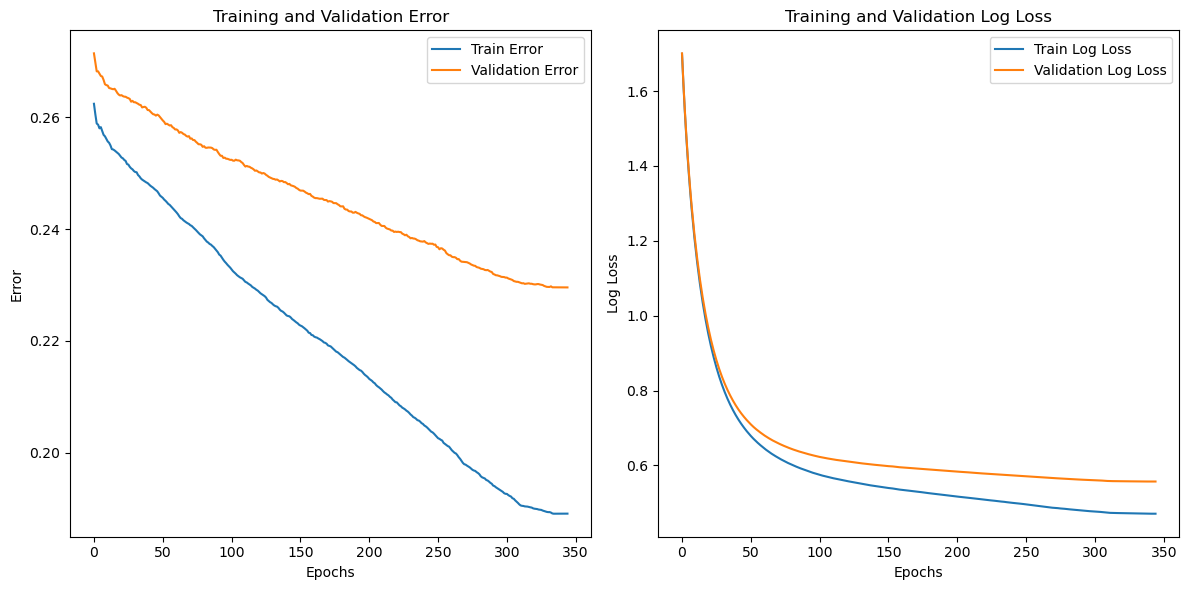

In [33]:
import matplotlib.pyplot as plt
# Lấy thông tin về loss từ kết quả đánh giá
results = final_model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
train_logloss = results['validation_0']['mlogloss']
val_logloss = results['validation_1']['mlogloss']

# Vẽ sơ đồ hàm loss
plt.figure(figsize=(12, 6))

# Loss trên tập Train
plt.subplot(1, 2, 1)
plt.plot(train_error, label='Train Error')
plt.plot(val_error, label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Validation Error')
plt.legend()

# Log Loss trên tập Train
plt.subplot(1, 2, 2)
plt.plot(train_logloss, label='Train Log Loss')
plt.plot(val_logloss, label='Validation Log Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training and Validation Log Loss')
plt.legend()

plt.tight_layout()
plt.show()


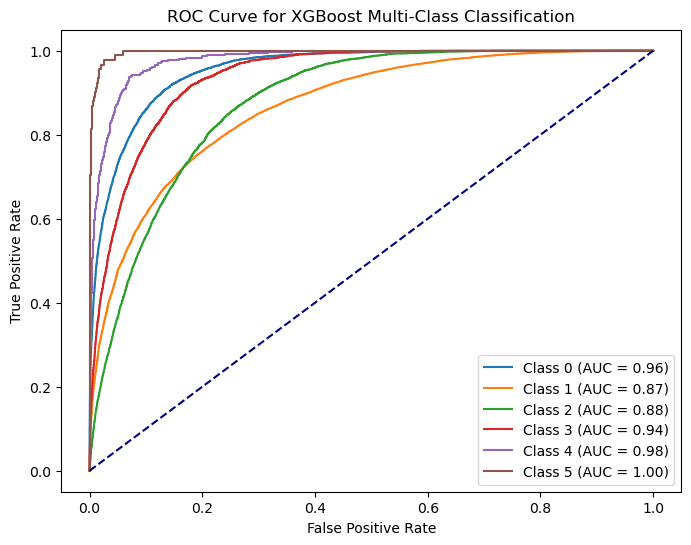

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

# Get predicted probabilities for each class
test_probs = final_model.predict_proba(select_X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Multi-Class Classification')
plt.legend()
plt.show()


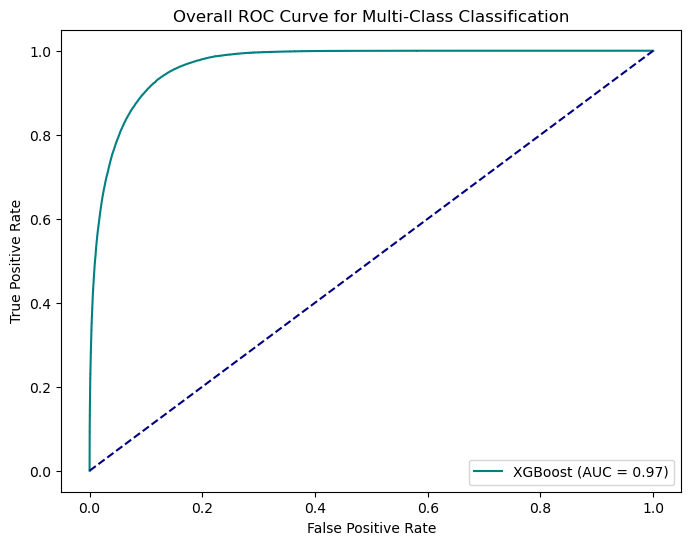

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

# Get predicted probabilities for each class
test_probs = final_model.predict_proba(select_X_test)

# Compute overall ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), test_probs.ravel())
roc_auc = auc(fpr, tpr)

# Plot the overall ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='teal')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve for Multi-Class Classification')
plt.legend()
plt.show()


In [ ]:
print("Siêu tham số tốt nhất: OrderedDict([('learning_rate', 0.5604146536977066),('max_dept',10),('min_child_weight', 1), ('n_estimators', 400)])")

Siêu tham số tốt nhất: OrderedDict([('learning_rate', 0.5604146536977066),('max_dept',10),('min_child_weight', 1), ('n_estimators', 400)])


LightGBM

In [ ]:
import numpy as np
import warnings
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Tắt cảnh báo liên quan đến tên đặc trưng
warnings.filterwarnings("ignore", category=UserWarning)

# Lựa chọn đặc trưng sử dụng độ quan trọng của LightGBM
model = LGBMClassifier(objective='multiclass', num_class=6, device='gpu')
model.fit(X_train, y_train)

# Chọn đặc trưng dựa trên độ quan trọng
selection = SelectFromModel(model, threshold=0.018071754, prefit=True)
select_X_train = selection.transform(X_train)
select_X_val = selection.transform(X_val)
select_X_test = selection.transform(X_test)

# Tính trọng số lớp
class_weights = []
for class_label in range(6):
    class_weight = len(y_train[y_train == class_label]) / len(y_train)
    class_weights.append(class_weight)

# Bộ tham số tối ưu đã được cung cấp
best_params = {
    'learning_rate': 0.05,
    'max_depth': 7,
    'min_child_weight': 2,
    'n_estimators': 250,
    'alpha': 0.5,
    'reg_lambda': 0.5,
    'gamma': 0.5
}

# Huấn luyện mô hình cuối cùng với bộ tham số tối ưu, trọng số lớp và regularization
final_model = LGBMClassifier(
    objective='multiclass',
    num_class=6,
    device='gpu',
    **best_params
)

# Fit mô hình cuối cùng
eval_set = [(select_X_train, y_train), (select_X_val, y_val)]
final_model.fit(select_X_train, y_train, eval_metric=["multi_error", "multi_logloss"], eval_set=eval_set, early_stopping_rounds=20, verbose=True)

# Đưa ra dự đoán trên tập huấn luyện
train_predictions = final_model.predict(select_X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Độ chính xác cuối cùng trên tập huấn luyện: %.2f%%" % (train_accuracy * 100.0))

# Đưa ra dự đoán trên tập xác thực
val_predictions = final_model.predict(select_X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Độ chính xác cuối cùng trên tập xác thực: %.2f%%" % (val_accuracy * 100.0))

# Đưa ra dự đoán trên tập kiểm thử (test set)
test_predictions = final_model.predict(select_X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Độ chính xác trên tập kiểm thử: %.2f%%" % (test_accuracy * 100.0))


[1]	training's multi_error: 0.330488	training's multi_logloss: 0.96693	valid_1's multi_error: 0.330481	valid_1's multi_logloss: 0.967686
[2]	training's multi_error: 0.330488	training's multi_logloss: 0.931974	valid_1's multi_error: 0.330481	valid_1's multi_logloss: 0.933482
[3]	training's multi_error: 0.330488	training's multi_logloss: 0.902983	valid_1's multi_error: 0.330481	valid_1's multi_logloss: 0.905175
[4]	training's multi_error: 0.330488	training's multi_logloss: 0.878325	valid_1's multi_error: 0.330481	valid_1's multi_logloss: 0.88106
[5]	training's multi_error: 0.330488	training's multi_logloss: 0.857086	valid_1's multi_error: 0.330481	valid_1's multi_logloss: 0.860346
[6]	training's multi_error: 0.330488	training's multi_logloss: 0.838422	valid_1's multi_error: 0.330481	valid_1's multi_logloss: 0.84221
[7]	training's multi_error: 0.328349	training's multi_logloss: 0.82202	valid_1's multi_error: 0.32815	valid_1's multi_logloss: 0.826255
[8]	training's multi_error: 0.317943	tr

In [ ]:
from sklearn.metrics import classification_report
# Dự đoán trên tập huấn luyện
select_y_train_pred_lgbm = final_model.predict(select_X_train)

# In kết quả và báo cáo
print("LightGBM Accuracy:", accuracy_score(y_train, select_y_train_pred_lgbm))
print("Classification Report for LightGBM:\n", classification_report(y_train, select_y_train_pred_lgbm))

LightGBM Accuracy: 0.7670044431230696
Classification Report for LightGBM:
               precision    recall  f1-score   support

         0.0       0.75      0.64      0.69     33908
         1.0       0.79      0.93      0.86    162137
         2.0       0.56      0.25      0.34     30242
         3.0       0.58      0.36      0.44     13762
         4.0       0.91      0.36      0.52      1700
         5.0       0.98      0.83      0.90       423

    accuracy                           0.77    242172
   macro avg       0.76      0.56      0.62    242172
weighted avg       0.75      0.77      0.74    242172



In [ ]:

# Dự đoán trên tập kiểm tra
select_y_test_pred_lgbm = final_model.predict(select_X_test)

# In kết quả và báo cáo
print("LightGBM Accuracy:", accuracy_score(y_test, select_y_test_pred_lgbm))
print("Classification Report for LightGBM:\n", classification_report(y_test, select_y_test_pred_lgbm))

# Dự đoán trên tập xác thực
select_y_val_pred_lgbm = final_model.predict(select_X_val)

# In kết quả và báo cáo
print("LightGBM Accuracy:", accuracy_score(y_val, select_y_val_pred_lgbm))
print("Classification Report for LightGBM:\n", classification_report(y_val, select_y_val_pred_lgbm))




LightGBM Accuracy: 0.7512429182564458
Classification Report for LightGBM:
               precision    recall  f1-score   support

         0.0       0.73      0.62      0.67      7266
         1.0       0.79      0.92      0.85     34744
         2.0       0.50      0.22      0.31      6480
         3.0       0.50      0.31      0.39      2949
         4.0       0.49      0.14      0.22       364
         5.0       0.70      0.35      0.47        91

    accuracy                           0.75     51894
   macro avg       0.61      0.43      0.48     51894
weighted avg       0.72      0.75      0.72     51894

LightGBM Accuracy: 0.7464254056345627
Classification Report for LightGBM:
               precision    recall  f1-score   support

         0.0       0.72      0.62      0.67      7266
         1.0       0.78      0.92      0.84     34744
         2.0       0.47      0.21      0.29      6481
         3.0       0.48      0.30      0.37      2949
         4.0       0.60      0.15   

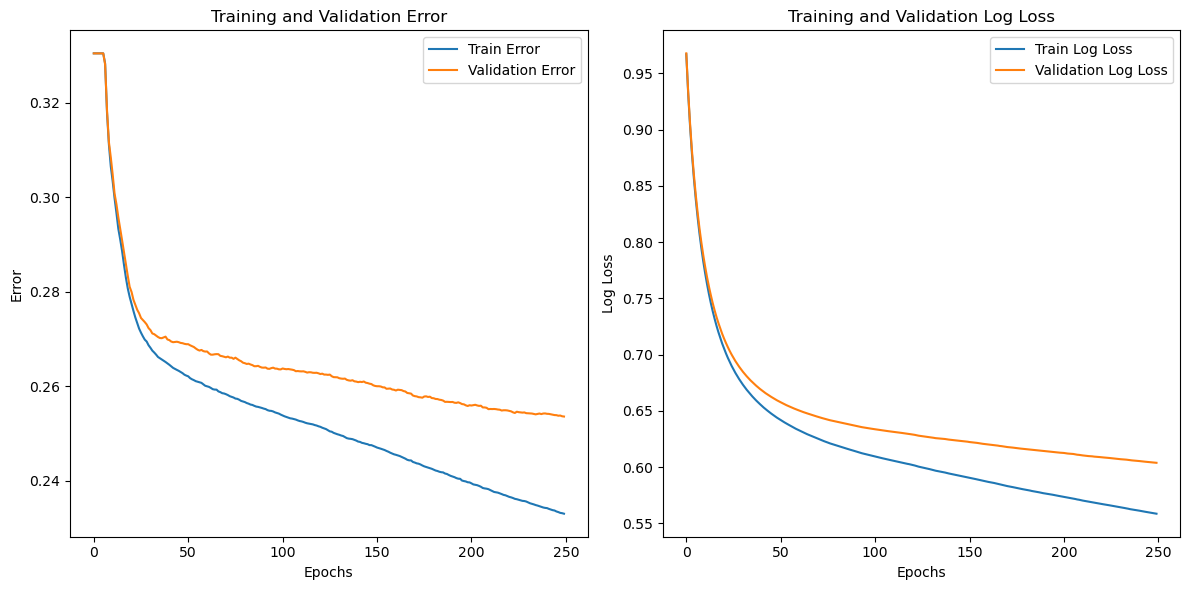

In [ ]:
import matplotlib.pyplot as plt

# Lấy thông tin về loss từ kết quả đánh giá
results = final_model.evals_result_
train_error = results['training']['multi_error']
val_error = results['valid_1']['multi_error']
train_logloss = results['training']['multi_logloss']
val_logloss = results['valid_1']['multi_logloss']

# Vẽ sơ đồ hàm loss
plt.figure(figsize=(12, 6))

# Loss trên tập Train
plt.subplot(1, 2, 1)
plt.plot(train_error, label='Train Error')
plt.plot(val_error, label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Validation Error')
plt.legend()

# Log Loss trên tập Train
plt.subplot(1, 2, 2)
plt.plot(train_logloss, label='Train Log Loss')
plt.plot(val_logloss, label='Validation Log Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training and Validation Log Loss')
plt.legend()

plt.tight_layout()
plt.show()
